# Projeto do Aluno - Fundamentos de Machine Learning

Ensaio de Machine Learning com dados da empresa Data Money.

**Algoritmos de Classificação**: KNN, Decision Tree, Random Forest e Logistic Regression

Métricas de performance: Accuracy, Precision, Recall e F1-Score

## 0.0 Imports:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics as mt
from sklearn import datasets as dt
from sklearn import tree as tr
from sklearn import model_selection as ms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from IPython.display import display, Math, Latex

## 1.0 Load datasets:

###  1.1 Classificação:

In [3]:
#Dados de treinamento:
X_training_class = pd.read_csv("classificacao/X_training.csv")
y_training_class = pd.read_csv("classificacao/y_training.csv")

#Dados de teste:
X_test_class = pd.read_csv("classificacao/X_test.csv")
y_test_class = pd.read_csv("classificacao/y_test.csv")

#Dados de validação:
X_validation_class = pd.read_csv("classificacao/X_validation.csv")
y_validation_class = pd.read_csv("classificacao/y_validation.csv")

## 2.0 Análise dos dados:

###  2.1 Classificação:

In [8]:
X_training_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72515 entries, 0 to 72514
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 72515 non-null  int64  
 1   customer_type                      72515 non-null  int64  
 2   age                                72515 non-null  float64
 3   class                              72515 non-null  float64
 4   flight_distance                    72515 non-null  float64
 5   inflight_wifi_service              72515 non-null  float64
 6   departure_arrival_time_convenient  72515 non-null  float64
 7   ease_of_online_booking             72515 non-null  float64
 8   gate_location                      72515 non-null  float64
 9   food_and_drink                     72515 non-null  float64
 10  online_boarding                    72515 non-null  float64
 11  seat_comfort                       72515 non-null  flo

In [9]:
y_training_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72515 entries, 0 to 72514
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       72515 non-null  int64
dtypes: int64(1)
memory usage: 566.6 KB


In [12]:
X_test_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25893 entries, 0 to 25892
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25893 non-null  int64  
 1   customer_type                      25893 non-null  int64  
 2   age                                25893 non-null  float64
 3   class                              25893 non-null  float64
 4   flight_distance                    25893 non-null  float64
 5   inflight_wifi_service              25893 non-null  float64
 6   departure_arrival_time_convenient  25893 non-null  float64
 7   ease_of_online_booking             25893 non-null  float64
 8   gate_location                      25893 non-null  float64
 9   food_and_drink                     25893 non-null  float64
 10  online_boarding                    25893 non-null  float64
 11  seat_comfort                       25893 non-null  flo

In [14]:
X_training_class.columns

Index(['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel'],
      dtype='object')

In [15]:
y_training_class.columns

Index(['0'], dtype='object')

In [12]:
X_training_class.head()

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,13508,1,0.500000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,...,0.5,1.00,0.6,0.4,0.000000,0.013848,1.0,0.0,1.0,0.0
1,28874,1,0.243590,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,...,0.5,0.50,0.2,0.6,0.000000,0.000000,0.0,1.0,1.0,0.0
2,21484,0,0.435897,1.0,0.026858,0.6,0.6,0.6,0.2,1.0,...,0.0,1.00,0.6,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0
3,48280,1,0.589744,0.5,0.041397,0.6,1.0,0.6,0.6,0.8,...,0.0,1.00,0.4,0.4,0.029499,0.020772,1.0,0.0,0.0,1.0
4,472,0,0.423077,1.0,0.016559,0.2,0.2,0.2,0.8,0.6,...,1.0,0.75,0.8,0.6,0.021632,0.019782,0.0,1.0,1.0,0.0


Conclusão: 

- Não há dados faltantes;
- Há  apenas 1 dados categórico não tratado: "id";
- Optei por remover a coluna "id".

## 3.0 Modelos de Classificação:

### 3.1 KNN:

In [27]:
#preparando os dados:
features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

X_train_knn = X_training_class.loc[:, features]
X_val_knn = X_validation_class.loc[:, features]
X_test_knn = X_test_class.loc[:, features]
y_train_knn = y_training_class.values.ravel()
y_val_knn = y_validation_class.values.ravel()
y_test_knn = y_test_class.values.ravel()

#### 3.1.1 Encontrando o melhor valor de k:

In [14]:
k_list = np.arange(3, 21, 2)
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for i in k_list:
    knn_classifier = KNeighborsClassifier( n_neighbors = i )
    knn_classifier.fit( X_train_knn, y_train_knn )
    y_pred = knn_classifier.predict( X_train_knn )
    
    #acurácia
    accuracy = mt.accuracy_score( y_train_knn, y_pred )
    accuracy_list.append(accuracy)
        
    #precisão
    precision = mt.precision_score( y_train_knn, y_pred )
    precision_list.append(precision)
    
    #recall
    recall = mt.recall_score( y_train_knn, y_pred )
    recall_list.append(recall)
    
    #f1-score:
    f1_score = mt.f1_score( y_train_knn, y_pred )
    f1_score_list.append(f1_score)

In [15]:
best_k = {'k': k_list, 'accuracy': accuracy_list, 'precision': precision_list, 'recall': recall_list, 'f1_score': f1_score_list}
k_values = pd.DataFrame(best_k)
k_values

,k,accuracy,precision,recall,f1_score
0,3,0.957016,0.973191,0.926340,0.949187
1,5,0.947583,0.970087,0.907026,0.937497
2,7,0.943019,0.968585,0.897639,0.931763
3,9,0.939557,0.967858,0.890098,0.927351
4,11,0.937103,0.966425,0.885643,0.924272
5,13,0.934800,0.964995,0.881539,0.921381
6,15,0.934055,0.964572,0.880171,0.920441
7,17,0.932607,0.963372,0.877880,0.918641
8,19,0.931573,0.962143,0.876607,0.917385


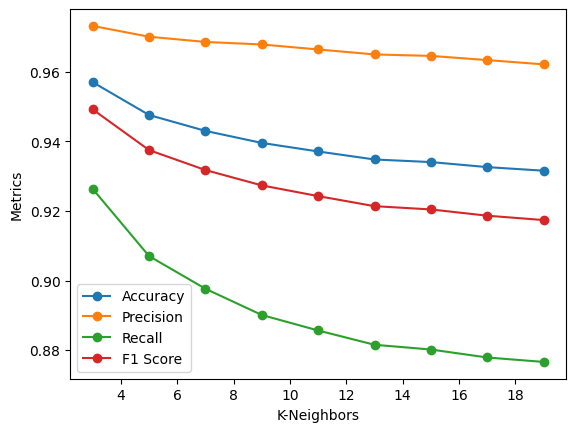

In [22]:
plt.plot(k_list, accuracy_list, marker="o", label="Accuracy")
plt.plot(k_list, precision_list, marker="o", label="Precision")
plt.plot(k_list, recall_list, marker="o", label="Recall")
plt.plot(k_list, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("K-Neighbors")
plt.ylabel("Metrics")
plt.legend()

In [28]:
performance_treino = [{'algoritmo': 'KNN' , 'dados': 'treino', 'accuracy': 0.957016 , 'precision': 0.973191, 'recall': 0.926340, 'f1_score': 0.949187}]
tabela_treino = pd.DataFrame(performance_treino)
tabela_treino

,algoritmo,dados,accuracy,precision,recall,f1_score
0,KNN,treino,0.957016,0.973191,0.92634,0.949187


Conclusão: o melhor valor de k é 3.

#### 3.1.2 Performance com os dados de validação com k = 3

In [57]:
#model definition
knn_classifier = KNeighborsClassifier( n_neighbors = 3 )

#model fit
knn_classifier.fit( X_train_knn, y_train_knn )

#performance
y_pred = knn_classifier.predict( X_val_knn)

In [58]:
#acurácia
accuracy_knn = mt.accuracy_score( y_val_knn, y_pred )
   
#precisão
precision_knn = mt.precision_score( y_val_knn, y_pred )
    
#recall
recall_knn = mt.recall_score( y_val_knn, y_pred )

#f1-score:
f1_score_knn = mt.f1_score( y_val_knn, y_pred )

performance_knn = [{'algoritmo': 'KNN' , 'dados': 'validação', 'accuracy': accuracy_knn, 'precision': precision_knn, 'recall': recall_knn, 'f1_score': f1_score_knn}]
tabela_val = pd.DataFrame(performance_knn)
tabela_val

,algoritmo,dados,accuracy,precision,recall,f1_score
0,KNN,validação,0.923517,0.942547,0.876977,0.90858


#### 3.1.3 Performance com os dados de teste com k = 3

In [59]:
y_pred = knn_classifier.predict( X_test_knn)

In [ ]:
#acurácia
accuracy_knn = mt.accuracy_score( y_test_knn, y_pred )
   
#precisão
precision_knn = mt.precision_score( y_test_knn, y_pred )
    
#recall
recall_knn = mt.recall_score( y_test_knn, y_pred )

#f1-score:
f1_score_knn = mt.f1_score( y_test_knn, y_pred )


performance_knn = [{'algoritmo': 'KNN' , 'dados': 'teste', 'accuracy': accuracy_knn, 'precision': precision_knn, 'recall': recall_knn, 'f1_score': f1_score_knn}]
tabela_test = pd.DataFrame(performance_knn)
tabela_test

,algoritmo,dados,accuracy,precision,recall,f1_score
0,KNN,teste,0.924613,0.942715,0.88183,0.911257


#### 3.1.4 Performance do KNN (k=3):

In [ ]:
perf_knn = pd.concat([tabela_treino, tabela_val, tabela_test])
perf_knn

,algoritmo,dados,accuracy,precision,recall,f1_score
0,KNN,treino,0.957016,0.973191,0.926340,0.949187
0,KNN,validação,0.923517,0.942547,0.876977,0.908580
0,KNN,teste,0.924613,0.942715,0.881830,0.911257


### 3.2 Decision Tree:

In [34]:
#preparando os dados:
features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

X_train_tr = X_training_class.loc[:, features]
X_val_tr = X_validation_class.loc[:, features]
X_test_tr = X_test_class.loc[:, features]
y_train_tr = y_training_class.values.ravel()
y_val_tr = y_validation_class.values.ravel()
y_test_tr = y_test_class.values.ravel()

#### 3.2.1 Encontrando o melhor valor de max_depth:

In [26]:
m = np.arange(2,36,1)
acc_list =[]
rec_list = []
prec_list = []
f1_list = []

In [29]:
for i in m:
    # model definition
    model_tr = tr.DecisionTreeClassifier( max_depth=i )

    # model training
    model_tr.fit ( X_train_tr, y_train_tr )
    
    # model performance
    yhat_train = model_tr.predict( X_train_tr)

    #accuracy:
    accuracy_tr = mt.accuracy_score( y_train_tr, yhat_train )
    acc_list.append(accuracy_tr)

    #recall:
    recall_tr = mt.recall_score( y_train_tr, yhat_train )
    rec_list.append(recall_tr)
    
    #precision:
    precision_tr = mt.precision_score( y_train_tr, yhat_train)
    prec_list.append(precision_tr)

    #f1_score:
    f1_tr = mt.f1_score( y_train_tr, yhat_train)
    f1_list.append(f1_tr)

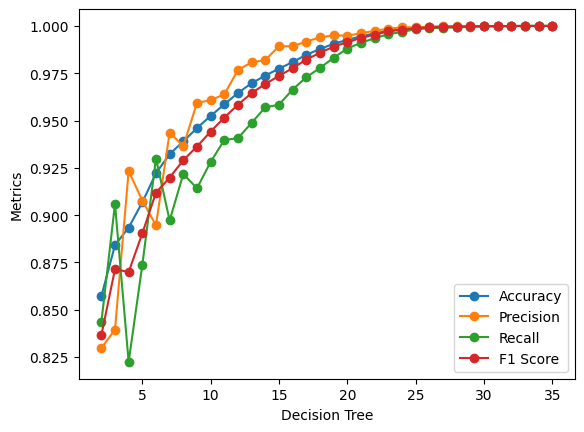

In [30]:
plt.plot(m, acc_list, marker="o", label="Accuracy")
plt.plot(m, prec_list, marker="o", label="Precision")
plt.plot(m, rec_list, marker="o", label="Recall")
plt.plot(m, f1_list, marker="o", label="F1 Score")
plt.xlabel("Decision Tree")
plt.ylabel("Metrics")
plt.legend()

In [31]:
best_max_depth = {'max_depth': m, 'accuracy': acc_list, 'precision': prec_list, 'recall': rec_list, 'f1_score': f1_list}
m_values = pd.DataFrame(best_max_depth)
m_values

,max_depth,accuracy,precision,recall,f1_score
0,2,0.857092,0.829749,0.843293,0.836466
1,3,0.884162,0.839506,0.905912,0.871446
2,4,0.893443,0.923308,0.822451,0.869966
3,5,0.906764,0.907732,0.873680,0.890381
4,6,0.922168,0.894661,0.929903,0.911942
5,7,0.932249,0.943677,0.897225,0.919865
6,8,0.938992,0.936478,0.921758,0.929059
7,9,0.946025,0.959332,0.914217,0.936231
8,10,0.952451,0.960804,0.928153,0.944196
9,11,0.958560,0.963807,0.939672,0.951586


In [35]:
performance_treino = [{'algoritmo': 'Decision Tree' , 'dados': 'treino', 'accuracy': 0.992608 , 'precision': 0.994874, 'recall': 0.988036, 'f1_score': 0.991443}]
tabela_treino_tr = pd.DataFrame(performance_treino)
tabela_treino_tr

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Decision Tree,treino,0.992608,0.994874,0.988036,0.991443


Conclusão: vou escolher o max_depth = 20, para evitar overffiting.

#### 3.2.2 Performance com os dados de validação com max_depth = 20

In [62]:
tr_classifier = tr.DecisionTreeClassifier( max_depth = 20 )
tr_classifier.fit( X_train_tr, y_train_tr )
yhat_val = tr_classifier.predict( X_val_tr )

In [63]:
#acurácia
accuracy_tr = mt.accuracy_score( y_val_tr, yhat_val )
   
#precisão
precision_tr = mt.precision_score( y_val_tr, yhat_val)
    
#recall
recall_tr = mt.recall_score( y_val_tr, yhat_val )

#f1-score:
f1_score_tr = mt.f1_score( y_val_tr, yhat_val )

performance_tr = [{'algoritmo': 'Decision Tree' , 'dados': 'validação', 'accuracy': accuracy_tr, 'precision': precision_tr, 'recall': recall_tr, 'f1_score': f1_score_tr}]
tabela_val_tr = pd.DataFrame(performance_tr)
tabela_val_tr

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Decision Tree,validação,0.947456,0.939412,0.939342,0.939377


#### 3.2.3 Performance com os dados de teste com max_depth = 20

In [64]:
yhat_test = tr_classifier.predict( X_test_tr )

In [65]:
#acurácia
accuracy_tr = mt.accuracy_score( y_test_tr, yhat_test )
   
#precisão
precision_tr = mt.precision_score( y_test_tr, yhat_test)
    
#recall
recall_tr = mt.recall_score( y_test_tr, yhat_test )

#f1-score:
f1_score_tr = mt.f1_score( y_test_tr, yhat_test )

performance_tr = [{'algoritmo': 'Decision Tree' , 'dados': 'test', 'accuracy': accuracy_tr, 'precision': precision_tr, 'recall': recall_tr, 'f1_score': f1_score_tr}]
tabela_test_tr = pd.DataFrame(performance_tr)
tabela_test_tr

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Decision Tree,test,0.946974,0.942594,0.936208,0.93939


#### 3.2.4 Performance do Decision Tree:

In [66]:
perf_tr = pd.concat([tabela_treino_tr, tabela_val_tr, tabela_test_tr])
perf_tr

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Decision Tree,treino,0.992608,0.994874,0.988036,0.991443
0,Decision Tree,validação,0.947456,0.939412,0.939342,0.939377
0,Decision Tree,test,0.946974,0.942594,0.936208,0.939390


### 3.3  Random Forest:

In [41]:
#preparando os dados:

features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

X_train_rf = X_training_class.loc[:, features]
X_val_rf = X_validation_class.loc[:, features]
X_test_rf = X_test_class.loc[:, features]
y_train_rf = y_training_class.values.ravel()
y_val_rf = y_validation_class.values.ravel()
y_test_rf = y_test_class.values.ravel()

#### 3.3.1 Encontrando os melhores valores de n_estimators e max_depth:

- max_depth:

In [5]:
#max_depth:
max_list = np.arange(2,36,1)
acc_list =[]
rec_list = []
prec_list = []
f1_list = []

In [8]:
for i in max_list:
    # model definition
    model_rf = RandomForestClassifier( max_depth=i )

    # model training
    model_rf.fit ( X_train_rf, y_train_rf )
    
    # model performance
    yhat_train = model_rf.predict( X_train_rf)

    #accuracy:
    accuracy_rf = mt.accuracy_score( y_train_rf, yhat_train )
    acc_list.append(accuracy_rf)

    #recall:
    recall_rf = mt.recall_score(  y_train_rf, yhat_train  )
    rec_list.append(recall_rf)
    
    #precision:
    precision_rf = mt.precision_score(  y_train_rf, yhat_train )
    prec_list.append(precision_rf)

    #f1_score:
    f1_rf = mt.f1_score(  y_train_rf, yhat_train )
    f1_list.append(f1_rf)

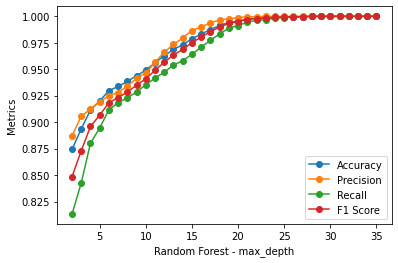

In [11]:
plt.plot(max_list, acc_list, marker="o", label="Accuracy")
plt.plot(max_list, prec_list, marker="o", label="Precision")
plt.plot(max_list, rec_list, marker="o", label="Recall")
plt.plot(max_list, f1_list, marker="o", label="F1 Score")
plt.xlabel("Random Forest - max_depth")
plt.ylabel("Metrics")
plt.legend()

In [13]:
best_max_depth = {'max_depth': max_list, 'accuracy': acc_list, 'precision': prec_list, 'recall': rec_list, 'f1_score': f1_list}
m_values = pd.DataFrame(best_max_depth)
m_values

,max_depth,accuracy,precision,recall,f1_score
0,2,0.874247,0.887188,0.813256,0.848615
1,3,0.893787,0.905656,0.842720,0.873055
2,4,0.911398,0.912359,0.880107,0.895943
3,5,0.920196,0.919121,0.894584,0.906687
4,6,0.929780,0.925213,0.911671,0.918392
5,7,0.933752,0.927956,0.918449,0.923178
6,8,0.938509,0.934269,0.923062,0.928632
7,9,0.943956,0.941383,0.928503,0.934899
8,10,0.949183,0.946589,0.935535,0.941030
9,11,0.956147,0.956496,0.941644,0.949012


Conclusão: melhor max_depth = 24

- n_estimators:

In [30]:
#n_estimators:

n_list = np.arange(10, 310, 10)
acc_list =[]
rec_list = []
prec_list = []
f1_list = []

In [31]:
for i in n_list:
    # model definition
    model_rf = RandomForestClassifier( max_depth= 24, n_estimators=i)

    # model training
    model_rf.fit ( X_train_rf, y_train_rf )
    
    # model performance
    yhat_train = model_rf.predict( X_train_rf)

    #accuracy:
    accuracy_rf = mt.accuracy_score( y_train_rf, yhat_train )
    acc_list.append(accuracy_rf)

    #recall:
    recall_rf = mt.recall_score(  y_train_rf, yhat_train  )
    rec_list.append(recall_rf)
    
    #precision:
    precision_rf = mt.precision_score(  y_train_rf, yhat_train )
    prec_list.append(precision_rf)

    #f1_score:
    f1_rf = mt.f1_score(  y_train_rf, yhat_train )
    f1_list.append(f1_rf)

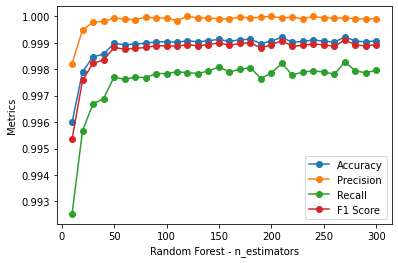

In [32]:
plt.plot(n_list, acc_list, marker="o", label="Accuracy")
plt.plot(n_list, prec_list, marker="o", label="Precision")
plt.plot(n_list, rec_list, marker="o", label="Recall")
plt.plot(n_list, f1_list, marker="o", label="F1 Score")
plt.xlabel("Random Forest - n_estimators")
plt.ylabel("Metrics")
plt.legend()

In [33]:
best_n = {'n_estimators': n_list, 'accuracy': acc_list, 'precision': prec_list, 'recall': rec_list, 'f1_score': f1_list}
n_values = pd.DataFrame(best_n)
n_values

,n_estimators,accuracy,precision,recall,f1_score
0,10,0.995987,0.998208,0.992523,0.995357
1,20,0.997904,0.999489,0.995673,0.997577
2,30,0.998469,0.999777,0.996691,0.998231
3,40,0.998566,0.999809,0.996882,0.998343
4,50,0.998980,0.999936,0.997709,0.998821
5,60,0.998924,0.999904,0.997614,0.998758
6,70,0.998952,0.999872,0.997709,0.998790
7,80,0.998980,0.999968,0.997677,0.998821
8,90,0.999035,0.999936,0.997836,0.998885
9,100,0.999035,0.999936,0.997836,0.998885


Melhor n_estimators: 270 (maior f1-score)

max_depth = 24, n_estimators = 270

#### 3.3.2 Performance com dados de treino:

In [67]:
#model definition
model_rf = RandomForestClassifier(max_depth = 24, n_estimators = 270)

#model training
model_rf.fit( X_train_rf, y_train_rf )

#model performance
yhat_train = model_rf.predict( X_train_rf )

#accuracy:
accuracy_rf = mt.accuracy_score( y_train_rf, yhat_train )

#recall:
recall_rf = mt.recall_score(  y_train_rf, yhat_train  )

#precision:
precision_rf = mt.precision_score(  y_train_rf, yhat_train )

#f1_score:
f1_rf = mt.f1_score(  y_train_rf, yhat_train )

In [68]:
performance_treino = [{'algoritmo': 'Random Forest' , 'dados': 'treino', 'accuracy': accuracy_rf , 'precision': precision_rf, 'recall': recall_rf, 'f1_score': f1_rf}]
tabela_treino_rf = pd.DataFrame(performance_treino)
tabela_treino_rf

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Random Forest,treino,0.999062,0.999968,0.997868,0.998917


#### 3.3.3 Performance com dados de validação:

In [69]:
#model performance
yhat_val = model_rf.predict( X_val_rf )

#accuracy:
accuracy_rf = mt.accuracy_score( y_val_rf, yhat_val )

#recall:
recall_rf = mt.recall_score( y_val_rf, yhat_val )

#precision:
precision_rf = mt.precision_score( y_val_rf, yhat_val )

#f1_score:
f1_rf = mt.f1_score( y_val_rf, yhat_val )

In [70]:
performance_val = [{'algoritmo': 'Random Forest' , 'dados': 'validação', 'accuracy': accuracy_rf , 'precision': precision_rf, 'recall': recall_rf, 'f1_score': f1_rf}]
tabela_val_rf = pd.DataFrame(performance_val)
tabela_val_rf

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Random Forest,validação,0.962708,0.97071,0.942386,0.956338


#### 3.3.4 Performance com dados de teste:

In [71]:
#model performance
yhat_test = model_rf.predict( X_test_rf )

#accuracy:
accuracy_rf = mt.accuracy_score( y_test_rf, yhat_test )

#recall:
recall_rf = mt.recall_score( y_test_rf, yhat_test  )

#precision:
precision_rf = mt.precision_score( y_test_rf, yhat_test )

#f1_score:
f1_rf = mt.f1_score( y_test_rf, yhat_test )

In [72]:
performance_test = [{'algoritmo': 'Random Forest' , 'dados': 'teste', 'accuracy': accuracy_rf , 'precision': precision_rf, 'recall': recall_rf, 'f1_score': f1_rf}]
tabela_test_rf = pd.DataFrame(performance_test)
tabela_test_rf

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Random Forest,teste,0.961688,0.969579,0.942279,0.955734


#### 3.3.4 Performance do Random Forest:

In [73]:
perf_rf = pd.concat([tabela_treino_rf, tabela_val_rf, tabela_test_rf])
perf_rf

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Random Forest,treino,0.999062,0.999968,0.997868,0.998917
0,Random Forest,validação,0.962708,0.970710,0.942386,0.956338
0,Random Forest,teste,0.961688,0.969579,0.942279,0.955734


### 3.4  Logistic Regression:

In [4]:
#preparando os dados:
features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

X_train_lr = X_training_class.loc[:, features]
X_val_lr = X_validation_class.loc[:, features]
X_test_lr = X_test_class.loc[:, features]
y_train_lr = y_training_class.values.ravel()
y_val_lr = y_validation_class.values.ravel()
y_test_lr = y_test_class.values.ravel()

In [17]:
#model definition
model_lr = LogisticRegression(C=1, max_iter = 200)

#### 3.4.1 Performance com os dados de treino:

In [18]:
# training
model_lr.fit( X_train_lr, y_train_lr)

# performance
y_pred_train = model_lr.predict( X_train_lr )

In [19]:
# accuracy
acc_lr_train = mt.accuracy_score( y_train_lr, y_pred_train)
# precision
pre_lr_train = mt.precision_score( y_train_lr, y_pred_train)
# recall
rec_lr_train = mt.recall_score( y_train_lr, y_pred_train)
# f1-score
f1_lr_train = mt.f1_score( y_train_lr, y_pred_train)

In [50]:
performance_lr_train = [{'algoritmo': 'Logistic Regression' , 'dados': 'treino', 'accuracy': acc_lr_train, 'precision': pre_lr_train, 'recall': rec_lr_train, 'f1_score': f1_lr_train}]
tabela_train_lr = pd.DataFrame(performance_lr_train)
tabela_train_lr

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Logistic Regression,treino,0.87524,0.870706,0.836324,0.853169


#### 3.4.2 Performance com os dados de teste:

In [12]:
#model performance
yhat_test_lr = model_lr.predict( X_test_lr )

In [15]:
# accuracy
acc_lr = mt.accuracy_score( y_test_lr, yhat_test_lr)
# precision
pre_lr = mt.precision_score( y_test_lr, yhat_test_lr)
# recall
rec_lr = mt.recall_score( y_test_lr, yhat_test_lr )
# f1-score
f1_lr = mt.f1_score( y_test_lr, yhat_test_lr)

In [16]:
performance_lr = [{'algoritmo': 'Logistic Regression' , 'dados': 'teste', 'accuracy': acc_lr, 'precision': pre_lr, 'recall': rec_lr, 'f1_score': f1_lr}]
tabela_test_lr = pd.DataFrame(performance_lr)
tabela_test_lr

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Logistic Regression,teste,0.870737,0.866386,0.83414,0.849957


#### 3.4.3 Performance com os dados de validação:

In [21]:
# performance
yhat_val_lr = model_lr.predict( X_val_lr )

In [23]:
# accuracy
acc_lr_val = mt.accuracy_score( y_val_lr, yhat_val_lr)
# precision
pre_lr_val = mt.precision_score( y_val_lr, yhat_val_lr)
# recall
rec_lr_val = mt.recall_score( y_val_lr, yhat_val_lr )
# f1-score
f1_lr_val = mt.f1_score( y_val_lr, yhat_val_lr)

In [24]:
performance_lr_val = [{'algoritmo': 'Logistic Regression' , 'dados': 'validação', 'accuracy': acc_lr_val, 'precision': pre_lr_val, 'recall': rec_lr_val, 'f1_score': f1_lr_val}]
tabela_val_lr = pd.DataFrame(performance_lr_val)
tabela_val_lr

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Logistic Regression,validação,0.87387,0.868716,0.835177,0.851616


#### 3.4.4 Performance da Regressão Logística:

In [51]:
perf_lr = pd.concat([tabela_train_lr, tabela_val_lr, tabela_test_lr])
perf_lr

,algoritmo,dados,accuracy,precision,recall,f1_score
0,Logistic Regression,treino,0.875240,0.870706,0.836324,0.853169
0,Logistic Regression,validação,0.873870,0.868716,0.835177,0.851616
0,Logistic Regression,teste,0.870737,0.866386,0.834140,0.849957


## 4.0 Performance dos modelos de Classificação:

In [74]:
perf_class = pd.concat([perf_knn, perf_tr, perf_rf, perf_lr])
perf_class

,algoritmo,dados,accuracy,precision,recall,f1_score
0,KNN,treino,0.957016,0.973191,0.926340,0.949187
0,KNN,validação,0.923517,0.942547,0.876977,0.908580
0,KNN,teste,0.924613,0.942715,0.881830,0.911257
0,Decision Tree,treino,0.992608,0.994874,0.988036,0.991443
0,Decision Tree,validação,0.947456,0.939412,0.939342,0.939377
0,Decision Tree,test,0.946974,0.942594,0.936208,0.939390
0,Random Forest,treino,0.999062,0.999968,0.997868,0.998917
0,Random Forest,validação,0.962708,0.970710,0.942386,0.956338
0,Random Forest,teste,0.961688,0.969579,0.942279,0.955734
0,Logistic Regression,treino,0.875240,0.870706,0.836324,0.853169
